In [28]:
import pandas as pd

In [29]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

df = pd.read_csv("data.txt",sep=';')

C:\Users\nagrimault\AppData\Local\Temp\ipykernel_7052\4233321427.py:4: DtypeWarning: Columns (1,2,5,6,7,8,9,15,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.txt",sep=';')


In [30]:
df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20,2017-02-01 07:32:14,1,0,0,0,551,0,0,0,"37,186667890919111","52,076033757361408",0,1,4,4,4,20,0,27134
1,A013011306908024927155000,78643045,0,20,2017-02-01 07:43:37,1,0,0,0,551,0,0,0,"48,844716275908937","52,076033757361408",1,2,"1,7976851851851852",4,4,"28,609999999999999","8,6099999999999994",27817
2,A013010002908283134592527,78643046,0,"57,640000000000001",2017-02-01 07:47:38,1,0,0,0,549,0,0,0,"73,118279569892479","52,076033757361408",0,1,4,4,4,"57,640000000000001",0,28058
3,A011010002908105209831316,78643047,0,"54,289999999999999",2017-02-01 07:48:48,0,1,1,1,267,0,0,0,"110,05692599620494","53,554233554497365",0,1,4,4,4,"54,289999999999999",0,28128
4,A013010041908000125652029,78643048,0,"26,899999999999999",2017-02-01 08:13:27,1,0,0,0,549,"3,769090654336556E-3","8,5863334286662614","1,1922637097134124E-3","45,36831264567185","52,076033757361408",1,1,"1,9971064814814814",4,4,"59,149999999999999","32,25",29607


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646774 entries, 0 to 4646773
Data columns (total 23 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   ZIBZIN                    object
 1   IDAvisAutorisationCheque  object
 2   FlagImpaye                object
 3   Montant                   object
 4   DateTransaction           object
 5   CodeDecision              object
 6   VerifianceCPT1            object
 7   VerifianceCPT2            object
 8   VerifianceCPT3            object
 9   D2CB                      object
 10  ScoringFP1                object
 11  ScoringFP2                object
 12  ScoringFP3                object
 13  TauxImpNb_RB              object
 14  TauxImpNB_CPM             object
 15  EcartNumCheq              object
 16  NbrMagasin3J              object
 17  DiffDateTr1               object
 18  DiffDateTr2               object
 19  DiffDateTr3               object
 20  CA3TRetMtt                object
 21  CA3TR   

In [32]:
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100
print(missing_values_percentage)

ZIBZIN                      0.0
IDAvisAutorisationCheque    0.0
FlagImpaye                  0.0
Montant                     0.0
DateTransaction             0.0
CodeDecision                0.0
VerifianceCPT1              0.0
VerifianceCPT2              0.0
VerifianceCPT3              0.0
D2CB                        0.0
ScoringFP1                  0.0
ScoringFP2                  0.0
ScoringFP3                  0.0
TauxImpNb_RB                0.0
TauxImpNB_CPM               0.0
EcartNumCheq                0.0
NbrMagasin3J                0.0
DiffDateTr1                 0.0
DiffDateTr2                 0.0
DiffDateTr3                 0.0
CA3TRetMtt                  0.0
CA3TR                       0.0
Heure                       0.0
dtype: float64


In [33]:
df['Montant'] = df['Montant'].str.replace(',','.') 

# Liste des colonnes à convertir en numérique
numeric_cols = ['VerifianceCPT1', 'VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP1',
                'ScoringFP2', 'ScoringFP3', 'TauxImpNb_RB', 'TauxImpNB_CPM', 'EcartNumCheq',
                'NbrMagasin3J', 'DiffDateTr1', 'DiffDateTr2', 'DiffDateTr3', 'CA3TRetMtt', 'CA3TR', 'Montant']

# Convertir les colonnes en types numériques
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# TEST (supprime bcp de Fraude)

In [34]:
print(df.shape)
# TEST 
df = df.dropna(subset=['VerifianceCPT1', 'VerifianceCPT2','VerifianceCPT3','DiffDateTr1','DiffDateTr2','DiffDateTr3'])
print(df.shape)

(4646774, 23)
(4068195, 23)


In [35]:
df['VerifianceCPT1'] = pd.to_numeric(df['VerifianceCPT1'], errors='coerce').astype(int)
df['VerifianceCPT2'] = pd.to_numeric(df['VerifianceCPT2'], errors='coerce').astype(int)
df['VerifianceCPT3'] = pd.to_numeric(df['VerifianceCPT3'], errors='coerce').astype(int)


# Arrondir DiffDate car normalement c'est un jour puis mettre en int

df['DiffDateTr1'] = pd.to_numeric(df['DiffDateTr1'], errors='coerce').astype(int)
df['DiffDateTr2'] = pd.to_numeric(df['DiffDateTr2'], errors='coerce').astype(int)
df['DiffDateTr3'] = pd.to_numeric(df['DiffDateTr3'], errors='coerce').astype(int)
               

df['D2CB'] = pd.to_numeric(df['D2CB'], errors='coerce').astype(int)
df['EcartNumCheq'] = pd.to_numeric(df['EcartNumCheq'], errors='coerce').astype(int)
df['NbrMagasin3J'] = pd.to_numeric(df['NbrMagasin3J'], errors='coerce').astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4068195 entries, 0 to 4646773
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ZIBZIN                    object 
 1   IDAvisAutorisationCheque  object 
 2   FlagImpaye                object 
 3   Montant                   float64
 4   DateTransaction           object 
 5   CodeDecision              object 
 6   VerifianceCPT1            int32  
 7   VerifianceCPT2            int32  
 8   VerifianceCPT3            int32  
 9   D2CB                      int32  
 10  ScoringFP1                float64
 11  ScoringFP2                float64
 12  ScoringFP3                float64
 13  TauxImpNb_RB              float64
 14  TauxImpNB_CPM             float64
 15  EcartNumCheq              int32  
 16  NbrMagasin3J              int32  
 17  DiffDateTr1               int32  
 18  DiffDateTr2               int32  
 19  DiffDateTr3               int32  
 20  CA3TRetMtt                flo

In [37]:
df['DateTransaction'] = pd.to_datetime(df['DateTransaction'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Créez de nouvelles colonnes pour le jour, le mois et l'année, ainsi que l'heure, la minute et la seconde
df['Jour'] = df['DateTransaction'].dt.day
df['Jour'] = df['Jour'].fillna(0).astype(int)
df['Mois'] = df['DateTransaction'].dt.month
df['Mois'] = df['Mois'].fillna(0).astype(int)


# Créez une nouvelle colonne 'Date' en combinant les composants jour, mois et année
df['Date'] = df['DateTransaction'].dt.date

# Supprimez la colonne originale 'DateTransaction' si vous ne souhaitez plus la conserver
df = df.drop(['DateTransaction'], axis=1)


In [38]:
df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Jour,Mois,Date
0,A013010004908126703060931,78643044,0,20.00,1,0,0,0,551,0.0,0.0,0.0,NaN,NaN,0,1,4,4,4,20.0,0.0,27134,1,2,2017-02-01
2,A013010002908283134592527,78643046,0,57.64,1,0,0,0,549,0.0,0.0,0.0,NaN,NaN,0,1,4,4,4,NaN,0.0,28058,1,2,2017-02-01
3,A011010002908105209831316,78643047,0,54.29,0,1,1,1,267,0.0,0.0,0.0,NaN,NaN,0,1,4,4,4,NaN,0.0,28128,1,2,2017-02-01
5,A044014706908021215591000,78643049,0,42.51,1,0,0,0,523,0.0,0.0,0.0,NaN,NaN,0,1,4,4,4,NaN,0.0,29633,1,2,2017-02-01
6,A059010041908012913210426,78643050,0,50.84,1,0,0,0,551,NaN,NaN,NaN,NaN,NaN,0,1,4,4,4,NaN,0.0,29904,1,2,2017-02-01


In [39]:
df.describe()

,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Jour,Mois
count,4.068195e+06,4.068195e+06,4.068195e+06,4.068195e+06,4.068195e+06,617824.000000,596199.0,596211.0,79491.000000,182512.0,4.068195e+06,4.068195e+06,4.068195e+06,4.068195e+06,4.068195e+06,326514.000000,4.068165e+06,4.068195e+06,4.068195e+06
mean,6.204384e+01,2.391938e-01,2.500249e-01,2.744011e-01,3.045646e+02,4.221565,0.0,0.0,18.247663,0.0,5.292519e-03,1.000001e+00,4.222595e+00,4.222612e+00,4.222612e+00,63.754164,1.376542e-05,1.582376e+01,5.055867e+00
std,1.058626e+02,4.420156e-01,4.786598e-01,5.541758e-01,2.215074e+02,50.474948,0.0,0.0,363.855591,0.0,1.064663e+01,1.108623e-03,4.160604e-01,4.159996e-01,4.159996e-01,303.476633,2.023663e-02,8.996927e+00,2.760896e+00
min,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,1.000000,0.000000e+00,1.000000e+00,2.000000e+00
25%,2.727000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,25.000000,0.000000e+00,8.000000e+00,3.000000e+00
50%,4.574000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.680000e+02,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,40.000000,0.000000e+00,1.600000e+01,4.000000e+00
75%,7.576000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.270000e+02,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,58.000000,0.000000e+00,2.400000e+01,7.000000e+00
max,1.212600e+05,1.600000e+01,2.600000e+01,3.000000e+01,5.510000e+02,12096.000000,0.0,0.0,10000.000000,0.0,2.147400e+04,2.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,121260.000000,3.500000e+01,3.100000e+01,1.100000e+01


# Supprimer ligne de header doublée

In [40]:
index_flag_impaye = df[df['FlagImpaye'] == 'FlagImpaye'].index
print(df.loc[index_flag_impaye])
index_flag_impaye = df[df['FlagImpaye'] == 'FlagImpaye'].index

# Supprimer les lignes correspondantes
df = df.drop(index_flag_impaye)

Empty DataFrame
Columns: [ZIBZIN, IDAvisAutorisationCheque, FlagImpaye, Montant, CodeDecision, VerifianceCPT1, VerifianceCPT2, VerifianceCPT3, D2CB, ScoringFP1, ScoringFP2, ScoringFP3, TauxImpNb_RB, TauxImpNB_CPM, EcartNumCheq, NbrMagasin3J, DiffDateTr1, DiffDateTr2, DiffDateTr3, CA3TRetMtt, CA3TR, Heure, Jour, Mois, Date]
Index: []


# Recoder en objet les objets

In [41]:
df['FlagImpaye'] = pd.to_numeric(df['FlagImpaye'], errors='coerce').astype(object)
df['FlagImpaye'].value_counts()

FlagImpaye
0    4044647
1      23548
Name: count, dtype: int64

In [42]:
df['CodeDecision'] = pd.to_numeric(df['CodeDecision'], errors='coerce').astype(object)
df['CodeDecision'].value_counts()

CodeDecision
0    3111265
1     939311
2      16656
3        962
4          1
Name: count, dtype: int64

In [43]:
# Vérifier le type de données après la conversion
print(df.dtypes)

ZIBZIN                       object
IDAvisAutorisationCheque     object
FlagImpaye                   object
Montant                     float64
CodeDecision                 object
VerifianceCPT1                int32
VerifianceCPT2                int32
VerifianceCPT3                int32
D2CB                          int32
ScoringFP1                  float64
ScoringFP2                  float64
ScoringFP3                  float64
TauxImpNb_RB                float64
TauxImpNB_CPM               float64
EcartNumCheq                  int32
NbrMagasin3J                  int32
DiffDateTr1                   int32
DiffDateTr2                   int32
DiffDateTr3                   int32
CA3TRetMtt                  float64
CA3TR                       float64
Heure                        object
Jour                          int32
Mois                          int32
Date                         object
dtype: object


# Enlever variables à une seule modalité ???

In [44]:
# df = df.drop('ScoringFP2', axis=1)
# df = df.drop('ScoringFP3', axis=1)
# df = df.drop('TauxImpNB_CPM', axis=1) 

# Missing values

In [45]:
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100
print(missing_values_percentage)

ZIBZIN                       0.000000
IDAvisAutorisationCheque     0.000000
FlagImpaye                   0.000000
Montant                      0.000000
CodeDecision                 0.000000
VerifianceCPT1               0.000000
VerifianceCPT2               0.000000
VerifianceCPT3               0.000000
D2CB                         0.000000
ScoringFP1                  84.813314
ScoringFP2                  85.344877
ScoringFP3                  85.344582
TauxImpNb_RB                98.046038
TauxImpNB_CPM               95.513686
EcartNumCheq                 0.000000
NbrMagasin3J                 0.000000
DiffDateTr1                  0.000000
DiffDateTr2                  0.000000
DiffDateTr3                  0.000000
CA3TRetMtt                  91.973984
CA3TR                        0.000737
Heure                        0.000000
Jour                         0.000000
Mois                         0.000000
Date                         0.000000
dtype: float64


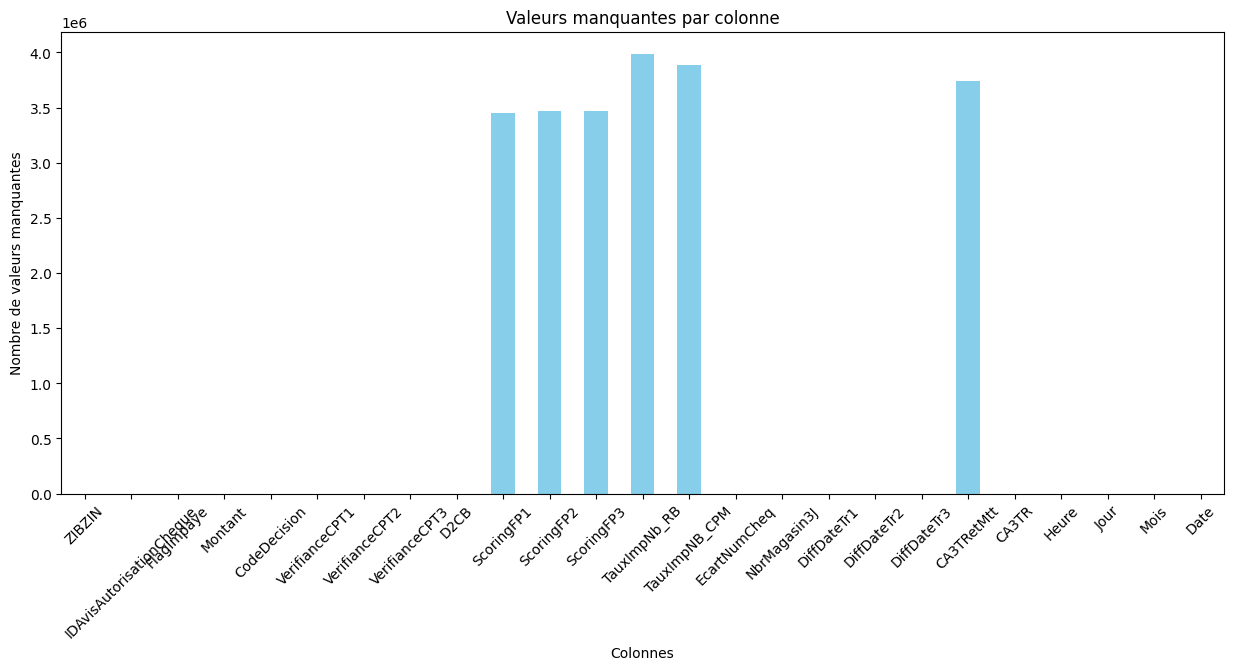

In [46]:
import matplotlib.pyplot as plt

# Tracer un histogramme des valeurs manquantes
plt.figure(figsize=(15, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.title('Valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.xticks(rotation=45)
plt.show()

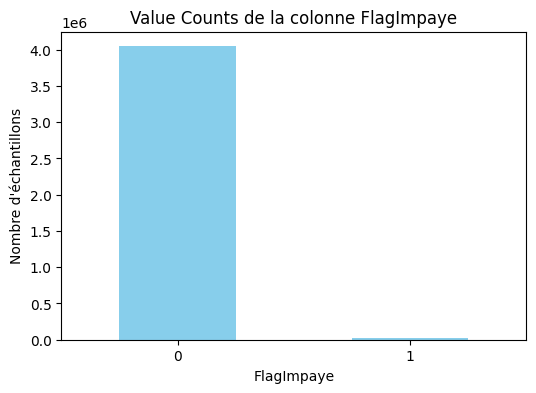

FlagImpaye
0    4044647
1      23548
Name: count, dtype: int64


In [47]:
# Value count de la colonne 'FlagImpaye' après SMOTE
value_counts = df['FlagImpaye'].value_counts()

# Créer un diagramme à barres
plt.figure(figsize=(6, 4))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts de la colonne FlagImpaye')
plt.xlabel('FlagImpaye')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(rotation=0)
plt.show()
print(value_counts)

Count of Fraud Transactions: 23,548
Count of Non-fraud Transactions: 4,044,647


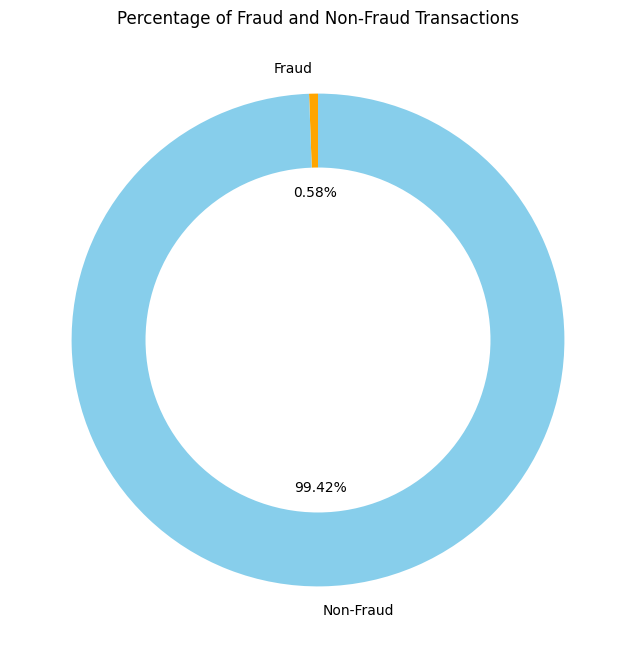

In [48]:
fraud_count = df[df["FlagImpaye"] == 1].shape[0]
non_fraud_count = df[df["FlagImpaye"] == 0].shape[0]

print(f"Count of Fraud Transactions: {f'{fraud_count:,.0f}'}")
print(f"Count of Non-fraud Transactions: {f'{non_fraud_count:,.0f}'}")

total_transactions = fraud_count + non_fraud_count

fraud_percentage = (fraud_count / total_transactions) * 100
non_fraud_percentage = (non_fraud_count / total_transactions) * 100

labels = ['Fraud', 'Non-Fraud']
sizes = [fraud_percentage, non_fraud_percentage]
colors = ['orange', 'skyblue']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Percentage of Fraud and Non-Fraud Transactions')
plt.show()

In [49]:
from sklearn.impute import SimpleImputer


cols_to_impute = ['Montant', 'VerifianceCPT1','VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP1','TauxImpNb_RB','EcartNumCheq','NbrMagasin3J','DiffDateTr1','DiffDateTr2','DiffDateTr3','CA3TRetMtt','CA3TR']

# Imputer avec la medianne
imputer = SimpleImputer(strategy='median')
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])


df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Jour,Mois,Date
0,A013010004908126703060931,78643044,0,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,4.0,4.0,4.0,20.0,0.0,27134,1,2,2017-02-01
2,A013010002908283134592527,78643046,0,57.64,1,0.0,0.0,0.0,549.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,4.0,4.0,4.0,40.0,0.0,28058,1,2,2017-02-01
3,A011010002908105209831316,78643047,0,54.29,0,1.0,1.0,1.0,267.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,4.0,4.0,4.0,40.0,0.0,28128,1,2,2017-02-01
5,A044014706908021215591000,78643049,0,42.51,1,0.0,0.0,0.0,523.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,4.0,4.0,4.0,40.0,0.0,29633,1,2,2017-02-01
6,A059010041908012913210426,78643050,0,50.84,1,0.0,0.0,0.0,551.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,4.0,4.0,4.0,40.0,0.0,29904,1,2,2017-02-01


In [55]:
print(df["ScoringFP1"].value_counts())

ScoringFP1
0.0       4046347
12.0          530
10.0          523
15.0          469
159.0         432
           ...   
1170.0          1
506.0           1
2665.0          1
530.0           1
850.0           1
Name: count, Length: 518, dtype: int64


In [ ]:
print(df["TauxImpNb_RB"].value_counts())

In [51]:
cols_to_impute = ['ZIBZIN', 'IDAvisAutorisationCheque','FlagImpaye', 'CodeDecision']

df[cols_to_impute] = df[cols_to_impute].fillna("inconnu")
df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Jour,Mois,Date
0,A013010004908126703060931,78643044,0,20.00,1,0.0,0.0,0.0,551.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,4.0,4.0,4.0,20.0,0.0,27134,1,2,2017-02-01
2,A013010002908283134592527,78643046,0,57.64,1,0.0,0.0,0.0,549.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,4.0,4.0,4.0,40.0,0.0,28058,1,2,2017-02-01
3,A011010002908105209831316,78643047,0,54.29,0,1.0,1.0,1.0,267.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,4.0,4.0,4.0,40.0,0.0,28128,1,2,2017-02-01
5,A044014706908021215591000,78643049,0,42.51,1,0.0,0.0,0.0,523.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,4.0,4.0,4.0,40.0,0.0,29633,1,2,2017-02-01
6,A059010041908012913210426,78643050,0,50.84,1,0.0,0.0,0.0,551.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,4.0,4.0,4.0,40.0,0.0,29904,1,2,2017-02-01


In [52]:
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100
print(missing_values_percentage)

ZIBZIN                       0.000000
IDAvisAutorisationCheque     0.000000
FlagImpaye                   0.000000
Montant                      0.000000
CodeDecision                 0.000000
VerifianceCPT1               0.000000
VerifianceCPT2               0.000000
VerifianceCPT3               0.000000
D2CB                         0.000000
ScoringFP1                   0.000000
ScoringFP2                  85.344877
ScoringFP3                  85.344582
TauxImpNb_RB                 0.000000
TauxImpNB_CPM               95.513686
EcartNumCheq                 0.000000
NbrMagasin3J                 0.000000
DiffDateTr1                  0.000000
DiffDateTr2                  0.000000
DiffDateTr3                  0.000000
CA3TRetMtt                   0.000000
CA3TR                        0.000000
Heure                        0.000000
Jour                         0.000000
Mois                         0.000000
Date                         0.000000
dtype: float64


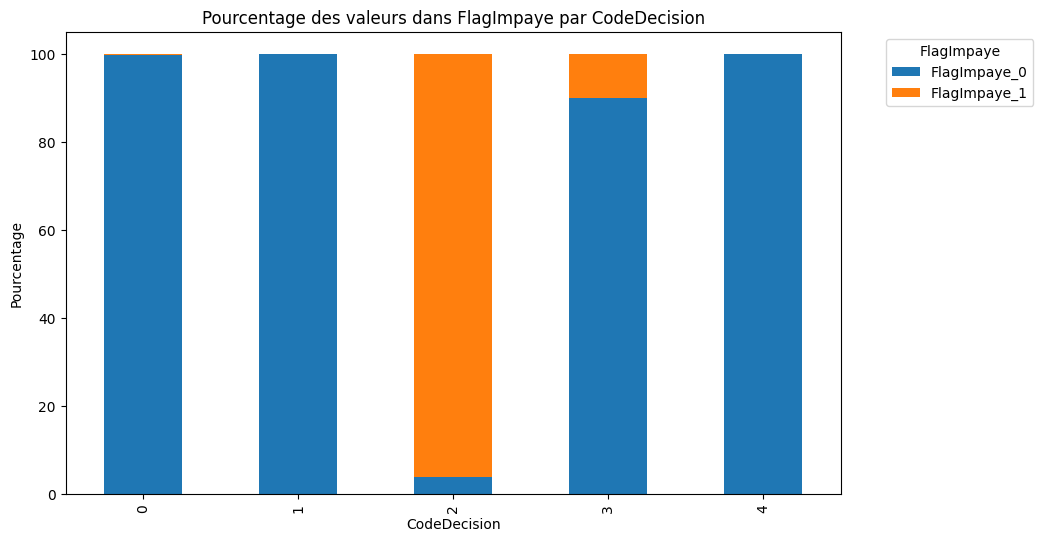

In [53]:
import matplotlib.pyplot as plt
# Utilisez crosstab avec normalize pour obtenir le pourcentage
table_correspondance = pd.crosstab(index=df['CodeDecision'], columns=df['FlagImpaye'], normalize='index') * 100

# Renommez les colonnes pour plus de clarté
table_correspondance.columns = ['FlagImpaye_0', 'FlagImpaye_1']

# Tracez un graphique à barres empilées
table_correspondance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Pourcentage des valeurs dans FlagImpaye par CodeDecision')
plt.xlabel('CodeDecision')
plt.ylabel('Pourcentage')
plt.legend(title='FlagImpaye', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le graphique
plt.show()

# SAVE DATAFRAME

In [54]:
df.to_csv('data/dataframe_clean.csv', index=False)